In [10]:
%matplotlib inline
import csv
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pylab import rcParams
csv.field_size_limit(sys.maxsize)
rcParams['figure.figsize'] = 5, 5

In [9]:
platforms = ['facebook']

# Single Term Analysis

In [3]:
def plot_single_term_dists(platform):
    ts_rel_freqs = {}
    deltas = {}
    element_counts = []
    
    # read in the data from the single term file
    with open('../data_files/' + str(platform) + '_single_term_probs.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            element_counts.append(len(row))
            for i in range(1, len(row)):
                # derive the relative frequencies
                if i not in ts_rel_freqs:
                    ts_rel_freqs[i] = [float(row[i])]
                else:
                    weekly_rel_freqs = ts_rel_freqs[i]
                    weekly_rel_freqs.append(float(row[i]))
                    ts_rel_freqs[i] = weekly_rel_freqs
                    
                # derive the delta values
                if i > 1:
                    delta = float(row[i]) - float(row[i-1])
                    if i not in deltas:
                        deltas[i] = [delta]
                    else:
                        weekly_deltas = deltas[i]
                        weekly_deltas.append(delta)
                        deltas[i] = weekly_deltas
        
        # remove the last elements in the rel freqs and deltas
        del ts_rel_freqs[max(ts_rel_freqs.keys())]        
        ds_rel_freqs = pd.DataFrame.from_dict(ts_rel_freqs)
        mean_vec_series = pd.Series(ds_rel_freqs.mean(), 
                                    index=range(min(ts_rel_freqs.keys()),
                                                max(ts_rel_freqs.keys())))
        
        del deltas[max(deltas.keys())]                
        ds_deltas = pd.DataFrame.from_dict(deltas)
        mean_deltas_series = pd.Series(ds_deltas.mean(),
                                       index=range(min(deltas.keys(), max(deltas.keys()))))
        
        # plot the relative frequency values
        fig = plt.figure()
        mean_vec_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel("Relative Frequency")
        plt.show()
        plt.clf()
        
        # plot the delta values
        fig = plt.figure()
        mean_deltas_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel(r"$\Delta$")
        plt.show()
        plt.clf()

Platform: facebook


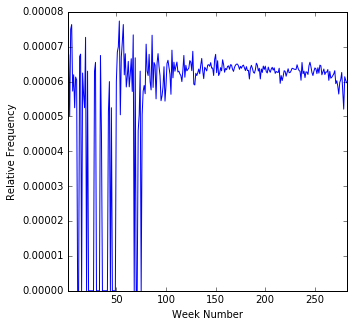

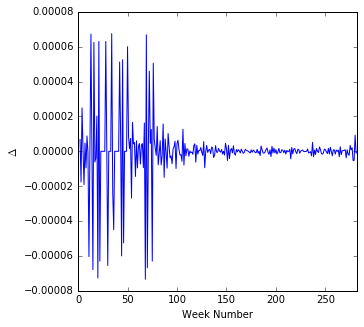

In [4]:
for platform in platforms:    
    print "Platform: " + platform
    plot_single_term_dists(platform)
    

# Dual Term Analysis

In [80]:
def plot_dual_term_dists(platform):
    ts_rel_freqs = {}
    deltas = {}
    element_counts = []
    
    # todo: read from tsv files generated using spark
    
    
    # read in the data from the single term file
    with open('../data/' + str(platform) + '_dual_term_probs.tsv', 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            element_counts.append(len(row))
            for i in range(1, len(row)):
                # derive the relative frequencies
                if i not in ts_rel_freqs:
                    ts_rel_freqs[i] = [float(row[i])]
                else:
                    weekly_rel_freqs = ts_rel_freqs[i]
                    weekly_rel_freqs.append(float(row[i]))
                    ts_rel_freqs[i] = weekly_rel_freqs
                    
                # derive the delta values
                if i > 1:
                    delta = float(row[i]) - float(row[i-1])
                    if i not in deltas:
                        deltas[i] = [delta]
                    else:
                        weekly_deltas = deltas[i]
                        weekly_deltas.append(delta)
                        deltas[i] = weekly_deltas
        
        # remove the last elements in the rel freqs and deltas
        del ts_rel_freqs[max(ts_rel_freqs.keys())]        
        ds_rel_freqs = pd.DataFrame.from_dict(ts_rel_freqs)
        mean_vec_series = pd.Series(ds_rel_freqs.mean(), 
                                    index=range(min(ts_rel_freqs.keys()),
                                                max(ts_rel_freqs.keys())))
        
        del deltas[max(deltas.keys())]                
        ds_deltas = pd.DataFrame.from_dict(deltas)
        mean_deltas_series = pd.Series(ds_deltas.mean(),
                                       index=range(min(deltas.keys(), max(deltas.keys()))))
        
        # plot the relative frequency values
        fig = plt.figure()
        mean_vec_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel("Relative Frequency")
        plt.show()
        plt.clf()
        
        # plot the delta values
        fig = plt.figure()
        mean_deltas_series.plot()
        plt.xlabel("Week Number")
        plt.ylabel(r"$\Delta$")
        plt.show()
        plt.clf()
        

In [ ]:
for platform in platforms:
    print "Platform: " + platform
    plot_dual_term_dists(platform)